In [4]:
from tensorflow.keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D
import os 
import pandas as pd 
import numpy as np

In [5]:
TRAIN_DIR='data/train'
TEST_DIR='data/test'

In [6]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [7]:
train=pd.DataFrame()
train['image'],train['label']=createdataframe(TRAIN_DIR)


angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [8]:
print(train)

                                           image     label
0         data/train\angry\Training_10118481.jpg     angry
1         data/train\angry\Training_10120469.jpg     angry
2         data/train\angry\Training_10131352.jpg     angry
3         data/train\angry\Training_10161559.jpg     angry
4          data/train\angry\Training_1021836.jpg     angry
...                                          ...       ...
28704  data/train\surprise\Training_99916297.jpg  surprise
28705  data/train\surprise\Training_99924420.jpg  surprise
28706  data/train\surprise\Training_99937001.jpg  surprise
28707  data/train\surprise\Training_99951755.jpg  surprise
28708  data/train\surprise\Training_99984132.jpg  surprise

[28709 rows x 2 columns]


In [9]:
test=pd.DataFrame()
test['image'],test['label']=createdataframe(TEST_DIR)


angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [10]:
print(test)

                                           image     label
0       data/test\angry\PrivateTest_10131363.jpg     angry
1       data/test\angry\PrivateTest_10304478.jpg     angry
2        data/test\angry\PrivateTest_1054527.jpg     angry
3       data/test\angry\PrivateTest_10590091.jpg     angry
4        data/test\angry\PrivateTest_1109992.jpg     angry
...                                          ...       ...
7173  data/test\surprise\PublicTest_98089595.jpg  surprise
7174  data/test\surprise\PublicTest_98567249.jpg  surprise
7175  data/test\surprise\PublicTest_98972870.jpg  surprise
7176  data/test\surprise\PublicTest_99242645.jpg  surprise
7177  data/test\surprise\PublicTest_99446963.jpg  surprise

[7178 rows x 2 columns]


In [11]:
from tqdm.notebook import tqdm

In [12]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )#yeh keras ka fuction hai joh humne starting mei import kara
        img = np.array(img)
        features.append(img)
    features = np.array(features) #yeh sab list se np array mei convert hore h
    features = features.reshape(len(features),48,48,1)#yaha reshape kare h 
    return features

In [13]:
train_features=extract_features(train['image'])

  0%|          | 0/28709 [00:00<?, ?it/s]

C:\Users\sanke\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [14]:
test_features=extract_features(test['image'])

  0%|          | 0/7178 [00:00<?, ?it/s]

In [15]:
x_train=train_features/255.0
x_test=test_features/255.0 #yaha 

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le=LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [18]:
y_train=le.transform(train['label'])
y_test=le.transform(test['label'])

In [19]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [20]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

C:\Users\sanke\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [22]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 1, validation_data = (x_test,y_test)) 


225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2356 - loss: 1.8383

KeyboardInterrupt: 

In [32]:

model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [33]:
from keras.models import model_from_json


In [37]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [38]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']


In [39]:

def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [47]:
image = r'data\train\sad\Training_396906.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
model prediction is  happy


In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
model prediction is  happy


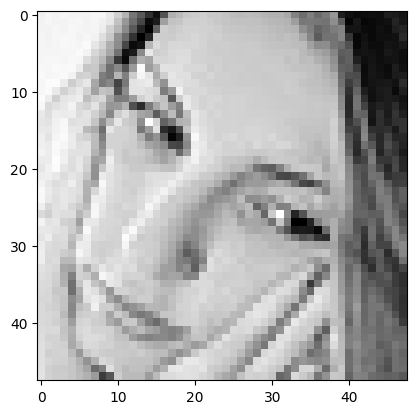

In [48]:

image = r'data\train\sad\Training_396906.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')